# Ajuste de curvas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/2.0_Ajuste_de_curvas.ipynb)

## Polinomio de interpolación de Lagrange

In [16]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


    valores de fi:  [ -5   1 -29  19]
divisores en L(i):  [ 18. -10. -90.  18.]

Polinomio de Lagrange, expresiones
29*(x - 4)*(x - 3)*(x - 1)/90 - 5*(x - 4)*(x - 3)*(x + 2)/18 - (x - 4)*(x - 1)*(x + 2)/10 + 19*(x - 3)*(x - 1)*(x + 2)/18

Polinomio de Lagrange: 
x**3 - 3*x**2 + 2*x - 5


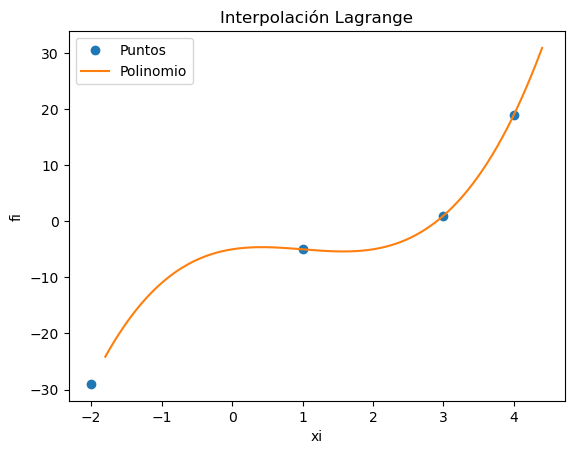

In [2]:
# Interpolacion de Lagrange
# INGRESO , Datos de prueba
xi = np.array([1, 3, -2, 4])
fi = np.array([-5, 1, -29, 19])

# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 1001
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(0.9*a,1.1*b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

# Método de Newton

In [1]:
from math import *
from pprint import pprint


def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P



In [2]:
import numpy as np
datost = [(-np.pi/2,np.sin(-np.pi/2)), (np.pi/6,np.sin(np.pi/6)), (np.pi/4,np.sin(np.pi/4)), (np.pi/2,np.sin(np.pi/2))]
T, P = NewtonPol(datost)
print("Tabla de diferencias divididas:")
pprint(T)
print("Evaluar el polinomio en x = 0:")


Tabla de diferencias divididas:
[[-1.0, 0, 0, 0],
 [0.49999999999999994, 0.7161972439135291, 0, 0],
 [0.7071067811865476, 0.7910896313685745, 0.031785316435797115, 0],
 [1.0, 0.37292322857805654, -0.3993195002344047, -0.1372249251275759]]
Evaluar el polinomio en x = 0:


In [5]:
P(np.pi/3)

0.8693248610171076

In [6]:
np.sin(np.pi/3)

0.8660254037844386

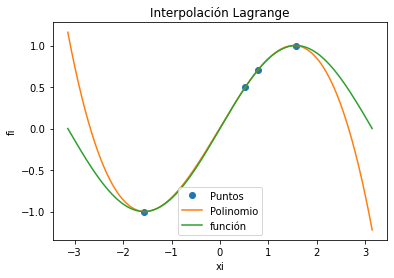

In [18]:
# Gráfica
f = lambda x: np.sin(x)
pxi = np.linspace(-np.pi,np.pi,1000)
pfi = P(pxi)
xi = [-np.pi/2, np.pi/6, np.pi/4, np.pi/2]
fi = f(xi)
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi , label = 'Polinomio')
plt.plot(pxi,f(pxi) , label = 'función')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

# Regresón Polinomial

In [116]:
import random
a_0, a_1, a_2 = 10, 6, -3
f = lambda x: a_0 + a_1*x + a_2*(x)**2
def f_cuadrada(x):
    noise = random.randrange(-100, 100, 1)/10
    return a_0 + a_1*x + a_2*(x**2) + noise

[-5.    -4.999 -4.998 ...  4.998  4.999  5.   ]
[-96.1, -73.35, -58.0, -54.65, -26.2, -14.35, -15.1, -5.65, 4.4, 11.85, 13.0, 3.65, 11.6, 5.35, 11.8, 6.65, 8.6, -15.35, -5.4, -25.75, -27.3]


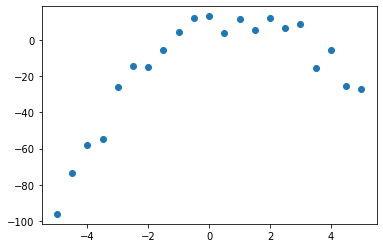

In [133]:
x = np.linspace(-5,5,21)
xi = np.linspace(-5,5,10001)
images = list()
for i in x:
    images.append(round(f_cuadrada(i),2))
x = np.array(x)
y = np.array(images)
print(xi)
print(images)
plt.plot(x, images,'o')
#plt.plot(xi, f(xi),'-')
plt.show()

In [134]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
print(sum_xi, sum_xi_2, sum_xi_3, sum_xi_4)
print(sum_yi, sum_xiyi, sum_xi_2yi)

0.0 192.5 0.0 3166.625
-340.29999999999995 1136.45 -7164.2


In [135]:
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve = np.linalg.solve(a, b)
print(solve)

[-2.88492377  5.90363636 10.24037267]


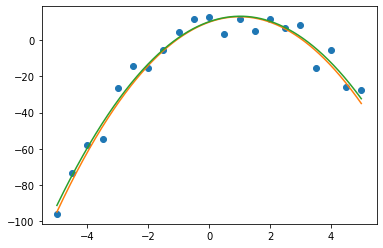

In [136]:
g = lambda x: solve[0]*x**2 + solve[1]*x + solve[2]
plt.plot(x, images,'o')
plt.plot(xi, f(xi),'-')
plt.plot(xi, g(xi),'-')
plt.show()